<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/heck_boronic_acids/heck_boronic_acids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [16]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [17]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 382, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 382 (delta 35), reused 33 (delta 14), pack-reused 321 (from 1)
Receiving objects: 100% (382/382), 34.92 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (243/243), done.
Updating files: 100% (93/93), done.


In [18]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

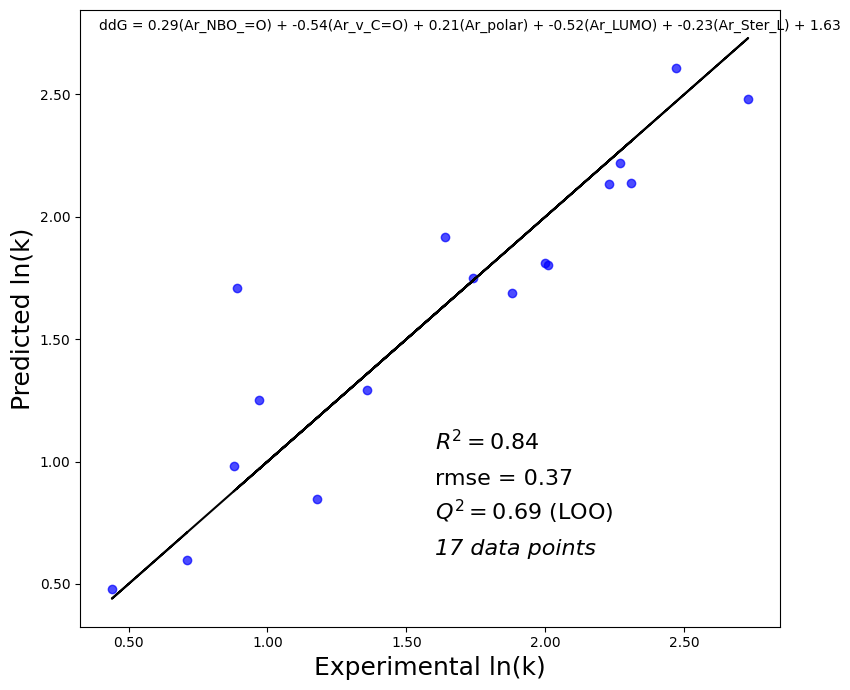

In [19]:
# 指定資料夾與檔案路徑
data_dir = "/content/DFTDescriptorPipeline/examples/heck_boronic_acids"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

# 一鍵執行
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=xlsx_path
)